In [86]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Reading the dataset with full paths
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# Displaying first few rows and basic information about the dataset
print("Dataset Shape:", train_data.shape)
print("\nFirst few rows of the dataset:")
train_data.head()


Dataset Shape: (1460, 81)

First few rows of the dataset:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [49]:
# Selecting the relevant subset for analysis
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'Neighborhood', 'HouseStyle', 'MSZoning']
subset_data = train_data[selected_features]

# Displaying the selected subset
print("\nSelected Subset of Data:")
subset_data.info()
subset_data.head()



Selected Subset of Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   GrLivArea     1460 non-null   int64 
 3   GarageCars    1460 non-null   int64 
 4   TotalBsmtSF   1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   Neighborhood  1460 non-null   object
 7   HouseStyle    1460 non-null   object
 8   MSZoning      1460 non-null   object
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  YearBuilt  \
0     208500            7       1710           2          856       2003   
1     181500            6       1262           2         1262       1976   
2     223500            7       1786           2          920       2001   
3     140000            7       1717           3          756       1915   
4     250000            8       2198           3         1145       2000   

  Neighborhood HouseStyle MSZoning  
0      CollgCr     2Story       RL  
1      Veenker     1Story       RL  
2      CollgCr     2Story       RL  
3      Crawfor     2Story       RL  
4      NoRidge     2Story       RL

In [51]:
# 1. Price Distribution Plot
fig_price_dist = px.histogram(
    train_data, 
    x='SalePrice',
    title='House Price Distribution',
    labels={'SalePrice': 'Sale Price ($)', 'count': 'Number of Houses'},
    color_discrete_sequence=['#0984e3']
)
fig_price_dist.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5
)
fig_price_dist.write_html("CKCS PROJECT FILE/plots/price_distribution.html")

In [53]:
# 2. Correlation Heatmap (focusing on numerical columns)
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numerical_cols].corr()
fig_corr = px.imshow(
    correlation_matrix,
    title='Feature Correlation Heatmap',
    color_continuous_scale='RdBu'
)
fig_corr.update_layout(
    title_x=0.5,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_corr.write_html("CKCS PROJECT FILE/plots/correlation_heatmap.html")

In [55]:
# 3. Price vs Living Area Scatter Plot
fig_price_area = px.scatter(
    train_data,
    x='GrLivArea',
    y='SalePrice',
    title='House Prices vs Living Area',
    labels={'GrLivArea': 'Above Ground Living Area (sq.ft)', 'SalePrice': 'Sale Price ($)'},
    color_discrete_sequence=['#0984e3']
)
fig_price_area.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5
)
fig_price_area.write_html("CKCS PROJECT FILE/plots/price_vs_area.html")


In [61]:
# 4. Price by Neighborhood Box Plot
fig_neighborhood = px.box(
    train_data,
    x='Neighborhood',
    y='SalePrice',
    title='House Prices by Neighborhood',
    labels={'Neighborhood': 'Neighborhood', 'SalePrice': 'Sale Price ($)'},
    color_discrete_sequence=['#0984e3']
)

fig_neighborhood.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5,
    xaxis_tickangle=45
)

fig_neighborhood.write_html("CKCS PROJECT FILE/plots/neighborhood_prices.html")

In [63]:
# 5. Price Trends Over Time
yearly_prices = train_data.groupby('YearBuilt')['SalePrice'].mean().reset_index()
fig_trends = px.line(
    yearly_prices,
    x='YearBuilt',
    y='SalePrice',
    title='Average House Prices by Year Built',
    labels={'YearBuilt': 'Year Built', 'SalePrice': 'Average Sale Price ($)'},
    color_discrete_sequence=['#0984e3']
)
fig_trends.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title_x=0.5
)
fig_trends.write_html("CKCS PROJECT FILE/plots/price_trends.html")

print("All visualizations have been created and saved!")

All visualizations have been created and saved!


In [65]:
# Selected features for our regression model
selected_features = [
    'OverallQual',    # Overall material and finish quality
    'GrLivArea',      # Above ground living area
    'GarageCars',     # Size of garage in car capacity
    'TotalBsmtSF',    # Total square feet of basement area
    'FullBath',       # Number of full bathrooms
    'YearBuilt',      # Original construction date
    'LotArea'         # Lot size in square feet
]

# Load the dataset using forward slashes
df = pd.read_csv(r'C:/Users/persa/OneDrive/Desktop/Full Stack Certificate Program/CKCS149 DNY/house-prices/train.csv')
print('Dataset shape:', df.shape)
print('\nFirst few rows of the dataset:')
df.head()

# Preparing features (X) and target (y)
X = df[selected_features]
y = df['SalePrice']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)


Dataset shape: (1460, 81)

First few rows of the dataset:
Training set shape: (1168, 7)
Testing set shape: (292, 7)


In [71]:
# Scaing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculating performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Model Performance:')
print(f'Training R² Score: {train_r2:.4f}')
print(f'Testing R² Score: {test_r2:.4f}')
print(f'Training RMSE: ${train_rmse:,.2f}')
print(f'Testing RMSE: ${test_rmse:,.2f}')

Model Performance:
Training R² Score: 0.7660
Testing R² Score: 0.7957
Training RMSE: $37,355.99
Testing RMSE: $39,583.55


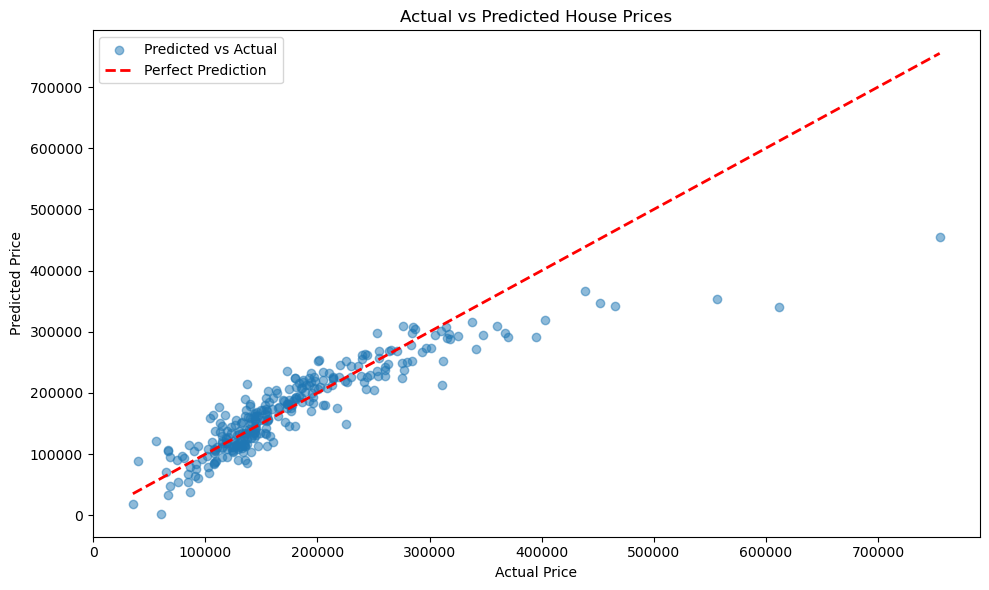


Feature Importance:
       Feature   Coefficient
0  OverallQual  29162.785577
1    GrLivArea  25521.815218
5    YearBuilt  11124.341316
2   GarageCars  10855.944605
3  TotalBsmtSF   9152.085299
6      LotArea   6908.499637
4     FullBath  -2743.335885


<Figure size 640x480 with 0 Axes>

In [73]:
# Ploting and saving the actual vs predicted values with legend
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()  # Add legend
plt.tight_layout()
plt.show()
plt.savefig('CKCS PROJECT FILE/plots/actual_vs_predicted.png')

# Show feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print('\nFeature Importance:')
print(feature_importance[['Feature', 'Coefficient']])

In [84]:
# Print detailed model analysis
print("Model Performance Analysis:")
print("-" * 50)
print(f"R² Score (Training): {train_r2:.4f} - This means our model explains {train_r2*100:.1f}% of price variation in training data")
print(f"R² Score (Testing): {test_r2:.4f} - This means our model explains {test_r2*100:.1f}% of price variation in testing data")
print(f"\nRMSE (Training): ${train_rmse:,.2f} - Average prediction error in training data")
print(f"RMSE (Testing): ${test_rmse:,.2f} - Average prediction error in testing data")

# Analyze feature importance with percentages
total_importance = feature_importance['Abs_Coefficient'].sum()
feature_importance['Importance_Percentage'] = (feature_importance['Abs_Coefficient'] / total_importance * 100)

print("\nFeature Importance Analysis:")
print("-" * 50)
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance_Percentage']:.1f}% impact on price prediction")

Model Performance Analysis:
--------------------------------------------------
R² Score (Training): 0.7660 - This means our model explains 76.6% of price variation in training data
R² Score (Testing): 0.7957 - This means our model explains 79.6% of price variation in testing data

RMSE (Training): $37,355.99 - Average prediction error in training data
RMSE (Testing): $39,583.55 - Average prediction error in testing data

Feature Importance Analysis:
--------------------------------------------------
OverallQual: 30.5% impact on price prediction
GrLivArea: 26.7% impact on price prediction
YearBuilt: 11.7% impact on price prediction
GarageCars: 11.4% impact on price prediction
TotalBsmtSF: 9.6% impact on price prediction
LotArea: 7.2% impact on price prediction
FullBath: 2.9% impact on price prediction


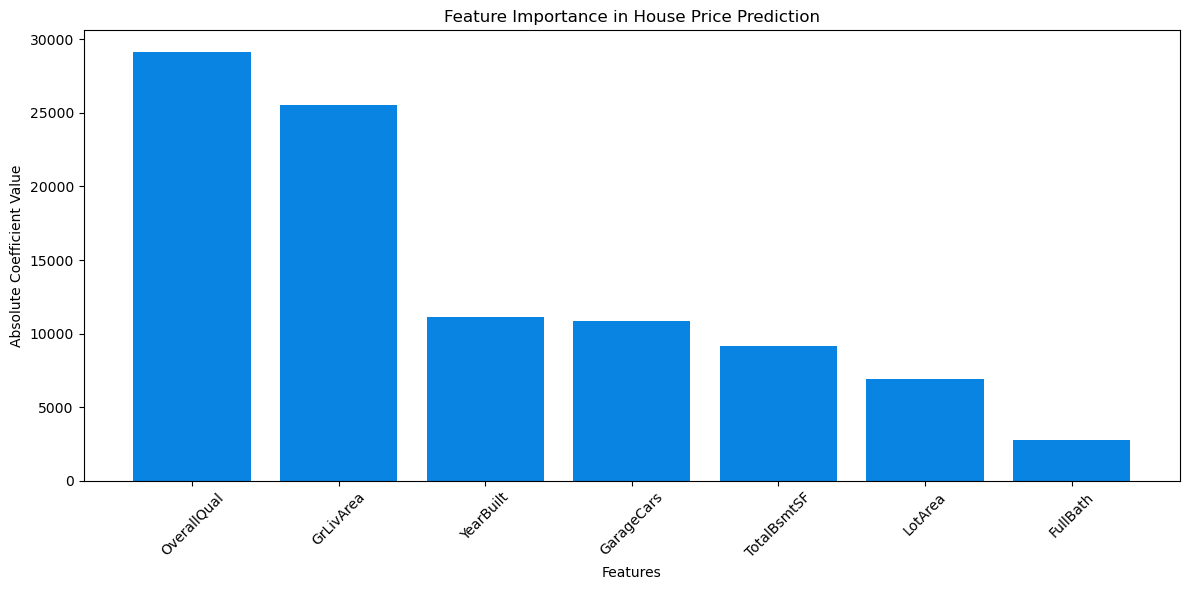

In [78]:
# Save the feature importance plot
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='#0984e3')
plt.xticks(rotation=45)
plt.title('Feature Importance in House Price Prediction')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.tight_layout()
plt.savefig('CKCS PROJECT FILE/plots/feature_importance.html')
plt.show()



In [75]:
# Function to make predictions
def predict_price(feature_values):
    # Create a DataFrame with the input values
    input_df = pd.DataFrame([feature_values], columns=selected_features)
    
    # Scale the input
    input_scaled = scaler.transform(input_df)
    
    # Make prediction
    predicted_price = model.predict(input_scaled)[0]
    
    return predicted_price

# Example house
example_house = {
    'OverallQual': 7,  # Above average quality
    'GrLivArea': 2000,  # 2000 sq ft living area
    'GarageCars': 2,   # 2 car garage
    'TotalBsmtSF': 1000,  # 1000 sq ft basement
    'FullBath': 2,     # 2 full bathrooms
    'YearBuilt': 2000, # Built in 2000
    'LotArea': 9000    # 9000 sq ft lot
}

# Make prediction for example house
predicted_price = predict_price(example_house)
print("\nExample Prediction:")
print("-" * 50)
print("For a house with:")
for feature, value in example_house.items():
    print(f"- {feature}: {value}")
print(f"\nPredicted Price: ${predicted_price:,.2f}")


Example Prediction:
--------------------------------------------------
For a house with:
- OverallQual: 7
- GrLivArea: 2000
- GarageCars: 2
- TotalBsmtSF: 1000
- FullBath: 2
- YearBuilt: 2000
- LotArea: 9000

Predicted Price: $232,435.94


In [77]:
# Create and save actual vs predicted plot as HTML
fig_prediction = go.Figure()

# Add scatter plot for predictions
fig_prediction.add_scatter(
    x=y_test, 
    y=y_test_pred,
    mode='markers',
    name='Predicted vs Actual',
    marker=dict(
        color='#0984e3',
        opacity=0.5
    )
)

# Add perfect prediction line
fig_prediction.add_scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(
        color='red',
        dash='dash'
    )
)

# Update layout
fig_prediction.update_layout(
    title='Actual vs Predicted House Prices',
    title_x=0.5,
    xaxis_title='Actual Price',
    yaxis_title='Predicted Price',
    template='plotly_white',
    width=1000,
    height=600
)

# Save as HTML
fig_prediction.write_html("CKCS PROJECT FILE/plots/actual_vs_predicted.html")

# Create and save feature importance plot as HTML
fig_importance = px.bar(
    feature_importance,
    x='Feature',
    y='Abs_Coefficient',
    title='Feature Importance in House Price Prediction',
    labels={'Abs_Coefficient': 'Absolute Coefficient Value', 'Feature': 'Features'},
    color_discrete_sequence=['#0984e3']
)

# Update layout
fig_importance.update_layout(
    title_x=0.5,
    xaxis_tickangle=45,
    template='plotly_white',
    width=1000,
    height=600
)

# Save as HTML
fig_importance.write_html("CKCS PROJECT FILE/plots/feature_importance.html")

print("Interactive HTML plots have been saved!")

Interactive HTML plots have been saved!
